In [11]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### random forest

![](./img/randomfrest.png)

![](./img/rf-bias-var.png)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [6]:
RandomForestClassifier?

In [8]:
from helper.plot_util import plot_tree_partition
from helper.plot_util import plot_2d_separator
from helper.plot_util import discrete_scatter

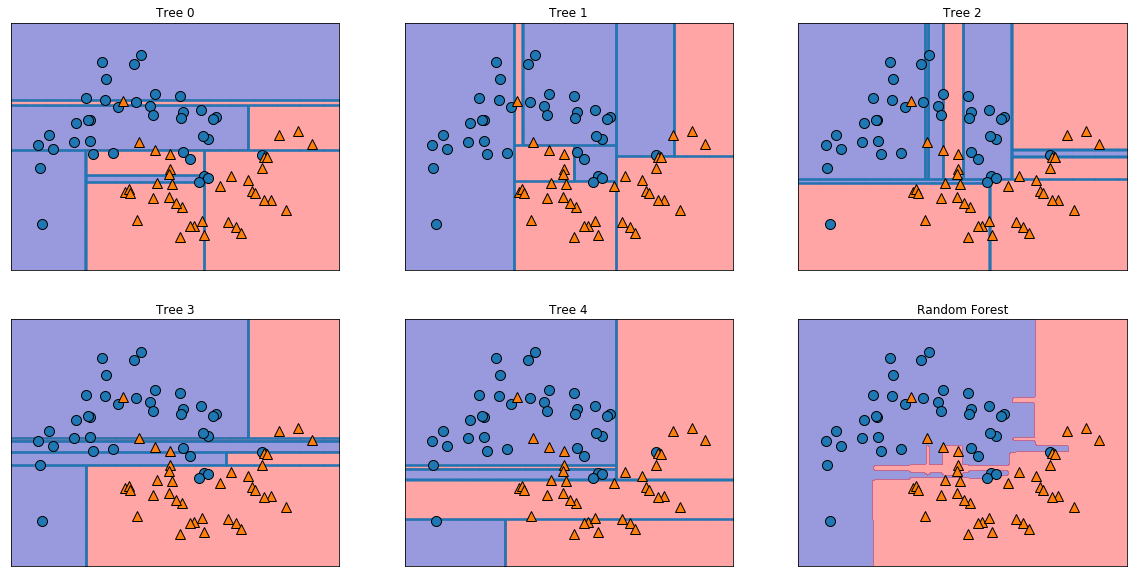

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    
plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [17]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


## GBDT

Gradient Boost其实是一个框架，里面可以套入很多不同的算法，Boost是"提升"的意思，一般Boosting算法都是一个迭代的过程，每一次新的训练都是为了改进上一次的结果。

   原始的Boost算法是在算法开始的时候，为每一个样本赋上一个权重值，初始的时候，大家都是一样重要的。在每一步训练中得到的模型，会使得数据点的估计有对有错，我们就在每一步结束后，增加分错的点的权重，减少分对的点的权重，这样使得某些点如果老是被分错，那么就会被“严重关注”，也就被赋上一个很高的权重。然后等进行了N次迭代（由用户指定），将会得到N个简单的分类器（basic learner），然后我们将它们组合起来（比如说可以对它们进行加权、或者让它们进行投票等），得到一个最终的模型。

   而Gradient Boost与传统的Boost的区别是，每一次的计算是为了减少上一次的残差(residual)，而为了消除残差，我们可以在残差减少的梯度(Gradient)方向上建立一个新的模型。所以说，在Gradient Boost中，每个新的模型的建立是为了使得之前模型的残差往梯度方向减少，与传统Boost对正确、错误的样本进行加权有着很大的区别

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [19]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [25]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965
